In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

print(cv.__version__)

def showGray(mat) :
    mat_color = cv.cvtColor(mat, cv.COLOR_GRAY2RGB)
    mat_show = mat_color[:,:,::-1]
    plt.imshow(mat_show)

def showColor(mat) :
    mat_show = mat[:,:,::-1]
    plt.imshow(mat_show)

4.5.4-dev


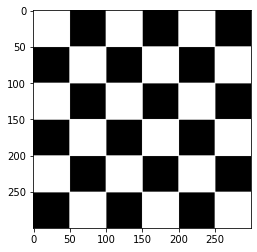

In [ ]:
import numpy as np
chessboard = np.zeros((300, 300), np.uint8)
for i in range(3):
    for j in range(3):
        cv.rectangle(chessboard, (100 * i, 100 * j), (100 * i + 50, 100 * j + 50), 255, -1)
        cv.rectangle(chessboard, (100 * i + 50, 100 * j + 50), (100 * i + 100, 100 * j + 100), 255, -1)
showGray(chessboard)
chessboard3 = cv.cvtColor(chessboard, cv.COLOR_GRAY2RGB)

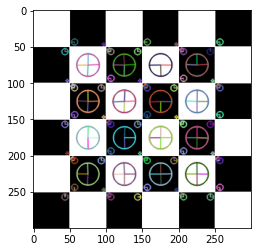

In [ ]:
sift = cv.SIFT_create()
kp = sift.detect(chessboard,None)
chessboard3 = cv.drawKeypoints(chessboard,kp,chessboard3,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
showColor(chessboard3)

In [ ]:
src = cv.imread("/work/f103/chessboard_4_6x5.jpg", cv.IMREAD_COLOR)
src.shape

(2448, 3264, 3)

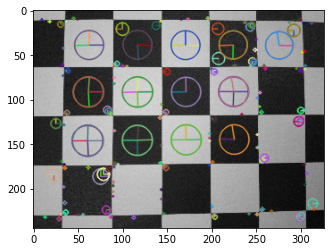

In [ ]:
small = cv.resize(src, (326, 244))
gray = cv.cvtColor(small, cv.COLOR_RGB2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
small = cv.drawKeypoints(gray,kp,small,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
showColor(small)

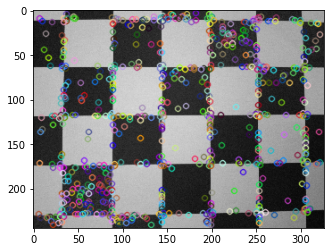

In [ ]:
small = cv.resize(src, (326, 244))
gray = cv.cvtColor(small, cv.COLOR_RGB2GRAY)
fast = cv.FastFeatureDetector_create()
kp = fast.detect(gray,None)
small = cv.drawKeypoints(gray,kp,small)
showColor(small)

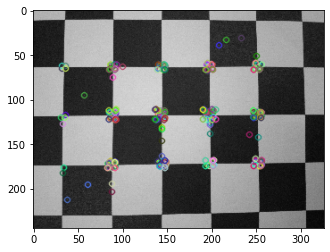

In [ ]:
small = cv.resize(src, (326, 244))
gray = cv.cvtColor(small, cv.COLOR_RGB2GRAY)
orb = cv.ORB_create()
kp = orb.detect(gray,None)
small = cv.drawKeypoints(gray,kp,small)
showColor(small)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


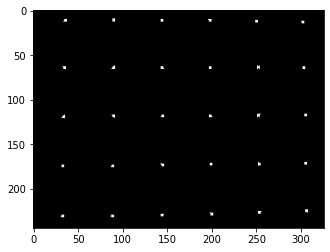

In [ ]:
import numpy as np
small = cv.resize(src, (326, 244))
gray = cv.cvtColor(small, cv.COLOR_RGB2GRAY)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst1 = cv.normalize(dst,0,255,cv.NORM_MINMAX)
showGray(dst1)

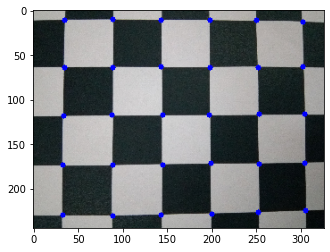

In [ ]:
import numpy as np
small = cv.resize(src, (326, 244))
gray = cv.cvtColor(small, cv.COLOR_RGB2GRAY)
corners = cv.goodFeaturesToTrack(gray,30,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(small,(x,y),3,255,-1)
showColor(small)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26e5d5b4-a604-4f7b-aef4-7756f8127ef0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>